# Introduction to the Datasets

![link text](https://ph-files.imgix.net/069dd825-cddf-4048-adde-8e81396c2c68?auto=format)


You will be working with datasets obtained through the [The Movie Database (TMDb) API](https://developers.themoviedb.org/3/getting-started/introduction). The first dataset is part of the MovieLens Latest Full Dataset, comprising 26 million ratings on 45.000 movies from 27.000 users. Let's look at the features in this dataset.

**Features**

* **adult**: Indicates if the movie is X-Rated.
* **belongs_to_collection**: A stringified dictionary with info on the movie series a particular film belongs to (e.g.: Lord of the Rings).
* **budget**: The movie budget in dollars.
* **genres**: A stringified list of dictionaries describing all genres associated with the movie.
* **homepage**: The movie's official homepage.
* **id**: An identifier for the movie.
* **imdb_id**: IMDB's identifier for the movie.
* **original_language**: The language in which the movie was shot.
* **original_title**: The original title of the movie.
* **overview**: A brief text about the movie.
* **popularity**: A Popularity Score given by TMDb.
* **poster_path**: The URL of the poster image.
* **production_companies**: A stringified list of production companies involved with making of the movie.
* **production_countries**: A stringified list of countries in which the movie was produced.
* **release_date**: Release date of the movie in theaters.
* **revenue**: The total revenue of the movie in dollars.
* **runtime**: The runtime of the movie in minutes.
* **spoken_languages**: A stringified list of languages spoken in the film.
* **status**: The status of the movie (Released, To Be Released, etc.)
* **tagline**: The movie's tagline.
* **title**: The official title of the movie.
* **video**: Indicates whether there is a video of the movie in TMDb.
* **vote_average**: The average rating of the movie, on a 0-10 scale.
* **vote_count**: The number of votes by users, as counted by TMDb.

# Imports

First, let's make sure to import Pandas and NumPy. 

In [2]:
import pandas as pd 
import numpy as np

# Exercise 1: Loading, preprocessing and cleaning the data (15 points)

Read the movie dataset from the following URL.

In [3]:
url = 'http://courses.compute.dtu.dk/02807/2021/projects/project1/movies_metadata.csv'

## Part 1: Reading and preprocessing the data (10 pts)

Pandas infers a data type for raw data from a `.csv`, defaulting to string type when no other `dtype` could be established. For example, the `genres` column in our dataset is read as a string with a *stringified* list of dictionaries as cell content. 

Some preprocessing steps are therefore needed, to convert the columns into their proper data types.

Write a function `load_movies_data()` that reads the URL into a Pandas DataFrame and preprocesses its columns to ensure that:

1. Data in the `release_date` column consists of Pandas `Timestamp` objects, except for missing values. For example, executing a code cell with `df.release_date[0]` should display the output `Timestamp('1995-10-30 00:00:00')`.

2. Data in `belongs_to_collection` consists of dictionaries, except for missing values.

3. Data in `genres`, `production_companies` and `production_countries` consists of lists of dictionaries, except for missing values. 

For example, executing a code cell with `df.genres[0]` should display the output 
```
[{'id': 16, 'name': 'Animation'},
 {'id': 35, 'name': 'Comedy'},
 {'id': 10751, 'name': 'Family'}]
```
which is a list type, not a string. The elements of the list are dictionaries (executing `df.genres[0][0]['name']` returns `'Animation'`). 

**Hint**: for items 2 and 3, you should use `ast.literal_eval`.

These conversions can be performed using Pandas' built-in functions and/or calling Pandas' `apply()` with appropriate arguments. Avoid explicit looping. You'll be asked below to time the loading and preprocessing step. 

In [4]:
import requests
import io
import ast

def load_movies_data(url):
    df = pd.read_csv(url)
    df["release_date"] = pd.to_datetime(df["release_date"],errors='coerce',format="%Y-%m-%d")
    df.loc[df.belongs_to_collection.notnull(),"belongs_to_collection"] = df.belongs_to_collection[df.belongs_to_collection.notnull()].apply(ast.literal_eval)
    df.loc[df.genres.notnull(),"genres"] = df.genres[df.genres.notnull()].apply(ast.literal_eval)
    df.loc[df.production_companies.notnull(),"production_companies"] = df.production_companies[df.production_companies.notnull()].apply(ast.literal_eval)
    df.loc[df.production_countries.notnull(),"production_countries"] = df.production_countries[df.production_countries.notnull()].apply(ast.literal_eval)
    return df

Now call `load_movies_data()` and load the data into a DataFrame `df`.

In [5]:
df = load_movies_data(url)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3263: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Display the DataFrame. You should check that it looks correct.

In [6]:
display(df)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaT,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


## Part 2: Timing your function (2.5 pts)

Time the performance of your function. To get the points for this part, the time reported below must not exceed 40 seconds.

In [7]:
load_time = %timeit -o -r 3 load_movies_data(url)
print("Time (s):", load_time.best)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\execution.py:1163: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  time_number = timer.timeit(number)
C:\ProgramData\Anaconda3\lib\timeit.py:205: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  t = self.timeit(number)


20.8 s ± 3.75 s per loop (mean ± std. dev. of 3 runs, 1 loop each)
Time (s): 15.536492800000005


## Part 3: Cleaning the data (2.5 pts)

Filter/drop all rows in `df` meeting any of these conditions:
* The `adult` value is not `'False'`
* The `vote_count` value is missing
* The `vote_average` value is missing

Do not loop over rows to perform these checks. Use Pandas' built-in functionality to do so. 

In [8]:
drop_rows = ( (df.adult != 'False') | (df.vote_count.isnull()) | (df.vote_average.isnull()) )
df.drop(df[drop_rows].index, inplace = True)

# Exercise 2: Computing IMDb's ratings (35 points)

The Top Rated 250 titles in IMDb are calculated using [a formula](https://help.imdb.com/article/imdb/track-movies-tv/ratings-faq/G67Y87TFYYP6TWAV#calculatetop) that takes into account the number of votes that a title has received, the minimum votes required to be on the list, and the mean vote for all titles. The rating for a title is given as follows:

$$ \text{weighted rating } = \left(\frac{v}{v+m} \cdot R\right) + \left(\frac{m}{v+m} \cdot C\right)$$

Where:

$m$ = the minimum number of votes required to be listed in the Top Rated ranking. We'll let $m=1000$.

$v$ = the number of votes received by the title (the title's **`vote_count`** value)

$R$ = the average rating for the title (the title's **`vote_average`** value)

$C$ = the mean vote across the whole list (the mean over the **`vote_average`** column)

We are going to compute the ratings for movies that could be listed in IMDb's Top Rated 250 ranking.  We want to do this as efficiently as possible. As a baseline for benchmarking, we'll use an approach that explicitly loops and indexes over the rows of the dataset and computes the weighted rating for the corresponding movie (if the movie has more than 1000 votes). 

In [9]:
C = df['vote_average'].mean()
m = 1000

def weighted_rating(row):
    if row['vote_count'] > m:
        v = row['vote_count']
        R = row['vote_average']
        return (v/(v+m) * R) + (m/(v+m) * C)
    else:
        return np.nan

def weighted_rating_loop(df):
    rating_list = []
    for i in range(len(df)):
        rating = weighted_rating(df.iloc[i])
        rating_list.append(rating)
    df['imdb_rating'] = rating_list

In [10]:
weighted_rating_loop(df)

columns_to_show = ['id', 'original_title'] + \
                  list(df.columns[df.columns.str.startswith('imdb_rating')])
df[columns_to_show].head()

,id,original_title,imdb_rating
0,862,Toy Story,7.375533
1,8844,Jumanji,6.524536
2,15602,Grumpier Old Men,NaN
3,31357,Waiting to Exhale,NaN
4,11862,Father of the Bride Part II,NaN


Let's look at the average performance of this function:

In [11]:
basic_time = %timeit -r 3 -o weighted_rating_loop(df)
print("Best time:", basic_time.best)

7.95 s ± 580 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
Best time: 7.4280145000000175


In the remaining parts of the exercise, you are going to be asked to come up with alternative ways to compute the ratings, using various methodologies. Let's create a score board to keep track of performance. Here's a description of the rows:

*   **Best single run time (s)**:  The best time used by your solution, in seconds.
*   **Marginal performance improvement**: The time improvement of your current solution over its immediately preceding solution. Given by: $\frac{\text{best single run time (s) of previous solution}}{\text{best single run time (s) of current solution}}$
*   **Performance improvement over basic looping**:  The time improvement over our baseline solution. Given by: $\frac{\text{best single run time (s) of weighted_rating_loop}}{\text{best single run time (s) of current solution}}$
*   **Best single run time (s, teacher)**: The time of a solution provided by the teacher. 
*   **Marginal performance improvement (teacher)**: The time improvement of the teacher's solution over its immediately preceding solution. 
*   **Performance improvement over basic looping (teacher)**:  The teacher's solution improvement over the baseline solution.



In [12]:
timing_data = {
    'Best single run time (s)': [basic_time.best, np.nan, np.nan, np.nan,np.nan],
    'Marginal performance improvement': [np.nan,np.nan, np.nan, np.nan,np.nan],
    'Performance improvement over basic looping': np.nan,
    'Best single run time (s, teacher)': [9.37, 3.87, 0.562, 0.0054, 0.00084],
    'Marginal performance improvement (teacher)': [np.nan, 'x2.42', 'x6.88', 'x103.8', 'x6.45'],
    'Performance improvement over basic looping (teacher)': [np.nan, 'x2.42', 'x16.69', 'x1732.17','x11172.98']
}

indices = ['Basic looping', 'Iterrows looping', 'apply()', 'Pandas vectorisation', 'NumPy vectorisation']
timings = pd.DataFrame(timing_data, index=indices)
timings

,Best single run time (s),Marginal performance improvement,Performance improvement over basic looping,"Best single run time (s, teacher)",Marginal performance improvement (teacher),Performance improvement over basic looping (teacher)
Basic looping,7.428015,NaN,NaN,9.37000,NaN,NaN
Iterrows looping,NaN,NaN,NaN,3.87000,x2.42,x2.42
apply(),NaN,NaN,NaN,0.56200,x6.88,x16.69
Pandas vectorisation,NaN,NaN,NaN,0.00540,x103.8,x1732.17
NumPy vectorisation,NaN,NaN,NaN,0.00084,x6.45,x11172.98


**The grading for the following parts works as follows.**

Let $m$ be the marginal performance improvement for the teacher's solution over basic looping, and let $m'$ be the marginal performance improvement for your solution over `basic_time`. If a part gives $n$ points, then you will get the $n$ points if $m' \geq 0.4 m$, and 0 points otherwise.

You don't get extra points for performing faster than the teacher's solution. But this is of course possible and you should feel free to optimise away as much as you want!

## Part 1: Looping with `iterrows` (2.5 pts)

Define a function `weighted_rating_iterrows(df)` that computes the ratings by looping over rows with the built-in iterator `iterrows`, and stores the results in a new column of the DataFrame called called `imdb_rating_iter`.

In [13]:
# your code goes here

def weighted_rating_iterrows(df):
  rating_list = []
  for idx, row in df.iterrows():
    rating = weighted_rating(row)
    rating_list.append(rating)
  df['imdb_rating_iter'] = rating_list

Call the function and make sure that it works as intended.

In [14]:
weighted_rating_iterrows(df)

pd.testing.assert_series_equal(
    df.imdb_rating, df.imdb_rating_iter, check_names=False
)

columns_to_show = ['id', 'original_title'] + \
                  list(df.columns[df.columns.str.startswith('imdb_rating')])
df[columns_to_show].head()

,id,original_title,imdb_rating,imdb_rating_iter
0,862,Toy Story,7.375533,7.375533
1,8844,Jumanji,6.524536,6.524536
2,15602,Grumpier Old Men,NaN,NaN
3,31357,Waiting to Exhale,NaN,NaN
4,11862,Father of the Bride Part II,NaN,NaN


Time the performance of the function.

In [15]:
iterrows_time = %timeit -r 3 -o weighted_rating_iterrows(df)
print("Best time:", iterrows_time.best)

4.42 s ± 89.4 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
Best time: 4.297808700000019


Update the score board with the best time, marginal and overall performance change you have obtained. Display the updated table below. 

In [16]:
# your code goes here

timings.iloc[1,0] = iterrows_time.best
timings.iloc[1,1] = basic_time.best / iterrows_time.best
timings.iloc[1,2] = basic_time.best / iterrows_time.best
timings

,Best single run time (s),Marginal performance improvement,Performance improvement over basic looping,"Best single run time (s, teacher)",Marginal performance improvement (teacher),Performance improvement over basic looping (teacher)
Basic looping,7.428015,NaN,NaN,9.37000,NaN,NaN
Iterrows looping,4.297809,1.728326,1.728326,3.87000,x2.42,x2.42
apply(),NaN,NaN,NaN,0.56200,x6.88,x16.69
Pandas vectorisation,NaN,NaN,NaN,0.00540,x103.8,x1732.17
NumPy vectorisation,NaN,NaN,NaN,0.00084,x6.45,x11172.98


## Part 2: Using `apply()`. (5 pts)

Define a function `weighted_rating_apply(df)` that computes the ratings using Pandas' `apply()` function, and stores the results in a new column of the DataFrame called `imdb_rating_apply`.

In [17]:
# your code goes here

def weighted_rating_apply(df):
  rating_list = []
  df['imdb_rating_apply'] = df.apply(weighted_rating,axis=1)

Call the function and make sure that it works as intended.

In [18]:
weighted_rating_apply(df)

pd.testing.assert_series_equal(
    df.imdb_rating, df.imdb_rating_apply, check_names=False
)

columns_to_show = ['id', 'original_title'] + \
                  list(df.columns[df.columns.str.startswith('imdb_rating')])
df[columns_to_show].head()

,id,original_title,imdb_rating,imdb_rating_iter,imdb_rating_apply
0,862,Toy Story,7.375533,7.375533,7.375533
1,8844,Jumanji,6.524536,6.524536,6.524536
2,15602,Grumpier Old Men,NaN,NaN,NaN
3,31357,Waiting to Exhale,NaN,NaN,NaN
4,11862,Father of the Bride Part II,NaN,NaN,NaN


Time the performance of the function.

In [19]:
apply_time = %timeit -r 3 -o weighted_rating_apply(df)
print("Best time:", apply_time.best)

925 ms ± 24.4 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
Best time: 0.8933662000000027


Update the score board with the best time, marginal and overall performance change you have obtained. Display the updated table below. 

In [20]:
# your code goes here

timings.iloc[2,0] = apply_time.best
timings.iloc[2,1] = iterrows_time.best / apply_time.best
timings.iloc[2,2] = basic_time.best / apply_time.best
timings

,Best single run time (s),Marginal performance improvement,Performance improvement over basic looping,"Best single run time (s, teacher)",Marginal performance improvement (teacher),Performance improvement over basic looping (teacher)
Basic looping,7.428015,NaN,NaN,9.37000,NaN,NaN
Iterrows looping,4.297809,1.728326,1.728326,3.87000,x2.42,x2.42
apply(),0.893366,4.810803,8.314636,0.56200,x6.88,x16.69
Pandas vectorisation,NaN,NaN,NaN,0.00540,x103.8,x1732.17
NumPy vectorisation,NaN,NaN,NaN,0.00084,x6.45,x11172.98


## Part 3: Vectorised solution with Pandas (12.5 pts)

Let's find a vectorised solution using Pandas. You have to define a function `weighted_rating_pandas(df)` that computes the ratings in a vectorised way and stores them in a new column of the DataFrame called `imdb_rating_pandas`. Use Pandas operations only: don't transform your data into NumPy arrays.

In [21]:
# your code goes here

def weighted_rating_pandas(df):
  v = df['vote_count']
  R = df['vote_average']
  df['imdb_rating_pandas'] = (v/(v+m) * R) + (m/(v+m) * C)
  df['imdb_rating_pandas'][v <= m] = np.nan

Call the function and make sure it works as intended.

In [22]:
weighted_rating_pandas(df)

pd.testing.assert_series_equal(
    df.imdb_rating, df.imdb_rating_pandas, check_names=False
)

columns_to_show = ['id', 'original_title'] + \
                  list(df.columns[df.columns.str.startswith('imdb_rating')])
df[columns_to_show].head()

<ipython-input-21-7628842dcf7c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['imdb_rating_pandas'][v <= m] = np.nan


,id,original_title,imdb_rating,imdb_rating_iter,imdb_rating_apply,imdb_rating_pandas
0,862,Toy Story,7.375533,7.375533,7.375533,7.375533
1,8844,Jumanji,6.524536,6.524536,6.524536,6.524536
2,15602,Grumpier Old Men,NaN,NaN,NaN,NaN
3,31357,Waiting to Exhale,NaN,NaN,NaN,NaN
4,11862,Father of the Bride Part II,NaN,NaN,NaN,NaN


Time the performance of the function.

In [23]:
pandas_time = %timeit -r 3 -o weighted_rating_pandas(df)
print("Best time:", pandas_time.best)

<ipython-input-21-7628842dcf7c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['imdb_rating_pandas'][v <= m] = np.nan


5.66 ms ± 401 µs per loop (mean ± std. dev. of 3 runs, 100 loops each)
Best time: 0.005149107999999955


Update the score board with the best time, marginal and overall performance change you have obtained. Display the updated table below. 

In [24]:
# your code goes here

timings.iloc[3,0] = pandas_time.best
timings.iloc[3,1] = apply_time.best / pandas_time.best
timings.iloc[3,2] = basic_time.best / pandas_time.best
timings

,Best single run time (s),Marginal performance improvement,Performance improvement over basic looping,"Best single run time (s, teacher)",Marginal performance improvement (teacher),Performance improvement over basic looping (teacher)
Basic looping,7.428015,NaN,NaN,9.37000,NaN,NaN
Iterrows looping,4.297809,1.728326,1.728326,3.87000,x2.42,x2.42
apply(),0.893366,4.810803,8.314636,0.56200,x6.88,x16.69
Pandas vectorisation,0.005149,173.499216,1442.582774,0.00540,x103.8,x1732.17
NumPy vectorisation,NaN,NaN,NaN,0.00084,x6.45,x11172.98


Time to reflect on your solution. Do the following: 
 
* Explain in words what your function does and why it is a vectorised solution. In particular, break down each step involving ufuncs, broadcasting and other vectorized calls. 
    * If your explanation has major errors, we will substract points for this part.
 
* Display profiler output and give an analysis of what you see.

In [25]:
# your code goes here
!pip install line_profiler
%reload_ext line_profiler
%lprun -f weighted_rating_pandas weighted_rating_pandas(df)


You should consider upgrading via the 'c:\programdata\anaconda3\python.exe -m pip install --upgrade pip' command.
<ipython-input-21-7628842dcf7c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['imdb_rating_pandas'][v <= m] = np.nan


**Profiling analysis**

The profiling shows where most time is spent running the code. Most time is spent on the dataframe operations when calculating the IMDB score and setting nan values.

**Reflection on vectorized solution**

The computations are done using the series of the dataframe (vectorized). 

Multiplying the series by a constant broadcasts the constant to each element of the series.
Addition of a constant also utilises broadcasting. This is because these operations are defined ufuncs.

Dividing the series is done using a ufunc that divides element-wise.

Checking if the v value is below m is also done in a vectorized way using a logical operator, and the values are set to np.nan using broadcasting.

The reason why using ufuncs improves the speed significantly compared to basic for-loops and iterating over the dataset is because ufuncs utilises that array elements are stored sequentially and we know the element-type is the same in the entire array. The Ufuncs are also often implemented in compiled C-code. The Ufuncs are numpy operations but Pandas uses them as they are a more general form of numpy arrays.

## Part 4: Vectorised solution with NumPy (12.5 pts)

Let's find a vectorised solution that uses NumPy to speed up the calculations. You have to define a function `weighted_rating_numpy(df)` that computes the ratings in a vectorised way and stores them in a new column of the DataFrame called `imdb_rating_numpy`.

In [26]:
# your code goes here

def weighted_rating_numpy(df):
  v = df['vote_count'].values
  R = df['vote_average'].values
  temp = (v/(v+m) * R) + (m/(v+m) * C)
  temp[v <= m] = np.nan
  df['imdb_rating_numpy'] = temp

Call the function and make sure it works as intended.

In [27]:
weighted_rating_numpy(df)

pd.testing.assert_series_equal(
    df.imdb_rating, df.imdb_rating_numpy, check_names=False
)

columns_to_show = ['id', 'original_title'] + \
                  list(df.columns[df.columns.str.startswith('imdb_rating')])
df[columns_to_show].head()

,id,original_title,imdb_rating,imdb_rating_iter,imdb_rating_apply,imdb_rating_pandas,imdb_rating_numpy
0,862,Toy Story,7.375533,7.375533,7.375533,7.375533,7.375533
1,8844,Jumanji,6.524536,6.524536,6.524536,6.524536,6.524536
2,15602,Grumpier Old Men,NaN,NaN,NaN,NaN,NaN
3,31357,Waiting to Exhale,NaN,NaN,NaN,NaN,NaN
4,11862,Father of the Bride Part II,NaN,NaN,NaN,NaN,NaN


Time the best performance of the function.

In [28]:
numpy_time = %timeit -r 3 -o weighted_rating_numpy(df)
print("Best time:", numpy_time.best)

519 µs ± 126 µs per loop (mean ± std. dev. of 3 runs, 1000 loops each)
Best time: 0.0004285193000000049


Update the score board with the best time, marginal and overall performance change you have obtained. Display the updated table below. 

In [29]:
timings.iloc[4,0] = numpy_time.best
timings.iloc[4,1] = pandas_time.best / numpy_time.best
timings.iloc[4,2] = basic_time.best / numpy_time.best
timings

,Best single run time (s),Marginal performance improvement,Performance improvement over basic looping,"Best single run time (s, teacher)",Marginal performance improvement (teacher),Performance improvement over basic looping (teacher)
Basic looping,7.428015,NaN,NaN,9.37000,NaN,NaN
Iterrows looping,4.297809,1.728326,1.728326,3.87000,x2.42,x2.42
apply(),0.893366,4.810803,8.314636,0.56200,x6.88,x16.69
Pandas vectorisation,0.005149,173.499216,1442.582774,0.00540,x103.8,x1732.17
NumPy vectorisation,0.000429,12.016047,17334.142243,0.00084,x6.45,x11172.98


Time to reflect on your solution. Do the following: 
 
* Explain in words what your function does and why it is a vectorised solution. In particular, break down each step involving ufuncs, broadcasting and other vectorized calls. 
    * If your explanation has major errors, we will substract points for this part.
    * If applicable, you may refer back to the explanation you gave for `weighted_rating_pandas`.
 
* Display profiler output and give an analysis of what you see.
    * Contrast your findings with those from `weighted_rating_pandas`.

In [30]:
%reload_ext line_profiler
%lprun -f weighted_rating_numpy weighted_rating_numpy(df)

**Reflection on numpy solution**

The explanation is the same as before with respect to the vectorized vectorations, broadcasting, and ufuncs, except now the operations are on numpy arrays, so there is less overhead in the operations.

**Reflection on profiling**

Compared to the pandas solution, there is much less time spent on the vectorized operations.


## Part 5: Find out the top 25 titles (2.5 pts)

What are the top 25 titles? Now that we have the IMDb ratings conveniently stored in a column, display the top 25 titles, together with their IMDb rating:

In [31]:
df[['original_title','imdb_rating']].sort_values('imdb_rating',ascending=False).head(25)

,original_title,imdb_rating
314,The Shawshank Redemption,8.192086
12481,The Dark Knight,8.097916
834,The Godfather,8.089770
2843,Fight Club,8.048880
292,Pulp Fiction,8.022704
15480,Inception,7.935393
351,Forrest Gump,7.917781
22879,Interstellar,7.896385
1154,The Empire Strikes Back,7.831115
7000,The Lord of the Rings: The Return of the King,7.831037


# Exercise 3: Predicting the genre of movies (40 points)

In this exercise, you'll be asked to create a number of features and use them to predict whether a movie is a science fiction movie or not. 
For this classification task, we'll work with a different part of the movies dataset, which contains more information for each movie.

In [32]:
train_url = 'http://courses.compute.dtu.dk/02807/2021/projects/project1/train.csv'

You'll try to predict whether a movie is a science fiction movie based on the other associated genres for the movie, the people and companies involved in making it, as well as its release date.

## Part 1: Adding binary features for genres (15 pts)

As in Exercise 1, the data on several columns is in a stringified format. Pre-process the following columns appropriately, as you did with the `genres` column in Part 1 of Exercise 1.
```
'belongs_to_collection', 'genres', 'production_companies','production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew'
```
 
Don't loop explicitly over the rows to perform this preprocessing. Your dataframe should be named `train`.

In [33]:
# your code goes here
def load_movies_data_train(url):
    df = pd.read_csv(url)
    df.loc[df.belongs_to_collection.notnull(),"belongs_to_collection"] = df.belongs_to_collection[df.belongs_to_collection.notnull()].apply(ast.literal_eval)
    df.loc[df.genres.notnull(),"genres"] = df.genres[df.genres.notnull()].apply(ast.literal_eval)
    df.loc[df.production_companies.notnull(),"production_companies"] = df.production_companies[df.production_companies.notnull()].apply(ast.literal_eval)
    df.loc[df.production_countries.notnull(),"production_countries"] = df.production_countries[df.production_countries.notnull()].apply(ast.literal_eval)
    df.loc[df.spoken_languages.notnull(),"spoken_languages"] = df.spoken_languages[df.spoken_languages.notnull()].apply(ast.literal_eval)
    df.loc[df.Keywords.notnull(),"Keywords"] = df.Keywords[df.Keywords.notnull()].apply(ast.literal_eval)
    df.loc[df.cast.notnull(),"cast"] = df.cast[df.cast.notnull()].apply(ast.literal_eval)
    df.loc[df.crew.notnull(),"crew"] = df.crew[df.crew.notnull()].apply(ast.literal_eval)
    return df

In [34]:
train2 = load_movies_data_train(train_url)
train = train2.copy()

Looking at the 'genres' column, you can see that movies have a varying number of associated genres.

In [35]:
# this will work only if you've already preprocessed the genres' column into lists of dicts
for i, v in enumerate(train.genres.head()):
    print(i, v)

0 [{'id': 35, 'name': 'Comedy'}]
1 [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]
2 [{'id': 18, 'name': 'Drama'}]
3 [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'name': 'Drama'}]
4 [{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]


Count the number of movies that have $n$ associated genres, for each $n$ in the dataset. If a movie has no associated genres, assign it the number 0. 

You have to use Pandas built-in functions only (no explicit looping). For example, you could use `apply()` with an appropriate function to apply to each row. 

Once you have the counts, visualise them as a bar chart, with one bar per possible number of associated genres, and the height of the bar representing the number of movies with that number of genres.


<AxesSubplot:>

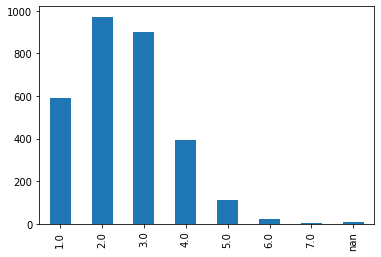

In [36]:
train.genres.str.len().value_counts(dropna=False).sort_index().plot.bar()

Let's create our binary features next. Complete the following steps:
 
1.   Transform the `genres` column by replacing its current entries with the list of names of genres occurring in the entries.  For example, the entry 
```
[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]
```
should be transformed into:
```
['Romance','Comedy']
```
Empty entries should be transformed into the empty list `[]`.

2. Create a separate column (in `train`) for each of the 20 genres, with name `genres_(nameofgenre)` (e.g. `genres_Comedy`). A movie should have a 1 on a genres column if the genre is one of the associated genres for that movie, and a 0 otherwise.
    * To get started, consider what operations create a data frame with dimensions as `train` and columns as specified here, based on the list output from step 1. Then combine this data frame with `train`.

You have to use Pandas built-in functions only (no explicit looping).

In [37]:
def list_fun(list):
  if isinstance(list, float):
    return []
  else:
    return [dic['name'] for dic in list]

In [38]:
def addNonehot(df,feature,N):
  df[feature] = df[feature].apply(list_fun)
  exp = df[feature].explode()
  idx = exp.value_counts()[0:N].index
  onehot = pd.get_dummies(exp[exp.isin(idx)],prefix=feature)
  onehot = onehot.groupby(onehot.index).sum()
  onehot = onehot.reindex(list(range(len(df[feature]))),fill_value=0)
  return pd.concat([df,onehot],axis=1)

In [39]:
train = addNonehot(train,'genres',20)

Visualise the number of movies per top 20 genre with a chart of your choice.

<AxesSubplot:>

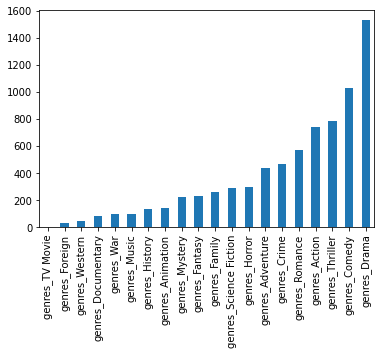

In [40]:
train.iloc[:,23:43].apply(sum,axis=0).sort_values().plot.bar()

## Part 2: Adding more binary features (5 pts)

You've now extracted binary features for all genres associated with a movie. But there's other information that we could use to base our predictions on. 

The `genres` column is just one out of several columns containing lists of dictionaries as entries. For example, the `production_companies` column also contains lists of dictionaries, providing names of the companies producing the movie. As you just did with genres, add new columns for:
 
1.   The names of the 30 most common production companies
2.   The names of the 30 most common production countries
3.   The names of the 30 most common actors (`cast` column) 
4.   The names of the 30 most common crew members
5.   The names of the 30 most common keywords
 
We recommend you generalize the functionality implemented in the previous question (e.g. to other columns and to restrict to top 30 most common values).

In [41]:
train = addNonehot(train,'production_companies',30)
train = addNonehot(train,'production_countries',30)
train = addNonehot(train,'cast',30)
train = addNonehot(train,'crew',30)
train = addNonehot(train,'Keywords',30)

Check the result. You should now have a much wider table, with the new columns consisting of binary features.

In [42]:
train.iloc[1:5,40:45]

,genres_Thriller,genres_War,genres_Western,production_companies_Amblin Entertainment,production_companies_BBC Films
1,0,0,0,0,0
2,0,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


 ## Part 3: Adding numerical date features (5 points)

Next, we'll create some features based on the release date information. Create a new column storing the value for each of the following  aspects of a release date:
 
```
['year', 'weekday', 'month', 'weekofyear', 'day', 'quarter']
```
 
As usual, don't iterate explicitly to create these columns.

In [43]:
def timefun(str):
  str = str.split('/')
  m = str[0].zfill(2)
  d = str[1].zfill(2)
  y = str[2]
  return m + '/' + d + '/' + y

In [44]:
train.release_date = train.release_date.apply(timefun)
train.release_date = pd.to_datetime(train.release_date,errors='coerce',format="%m/%d/%y")

In [45]:
train['release_date_year'] = train.release_date.apply(lambda x: x.year).values
train['release_date_weekday'] = train.release_date.apply(lambda x: x.weekday()).values
train['release_date_month'] = train.release_date.apply(lambda x: x.month).values
train['release_date_weekofyear'] = train.release_date.apply(lambda x: x.weekofyear).values
train['release_date_day'] = train.release_date.apply(lambda x: x.day).values
train['release_date_quarter'] = train.release_date.apply(lambda x: x.quarter).values

In [46]:
train.iloc[1:5,193:199]

,release_date_year,release_date_weekday,release_date_month,release_date_weekofyear,release_date_day,release_date_quarter
1,2004,4,8,32,6,3
2,2014,4,10,41,10,4
3,2012,4,3,10,9,1
4,2009,3,2,6,5,1


Next, we'll drop the columns that will not be used for learning. 

In [47]:
train = train.drop(['id', 'homepage', 'original_language',
                    'title', 'imdb_id','crew', 'poster_path', 
                    'release_date', 'status', 'belongs_to_collection',
                    'Keywords', 'original_title', 'overview',
                    'production_companies', 'production_countries', 
                    'spoken_languages', 'tagline', 'cast','genres'], 
                   axis=1)

Lastly, drop any rows with missing values.

In [48]:
train = train.dropna()
len(train)

2998

## Part 4: Prediction (10 pts)

Let's load the necessary `sklearn` libraries and prepare the training data for learning. Recall that your goal is to predict whether a movie has science fiction as an associated genre. So you're dealing with a binary classification task.

In [49]:
from sklearn.model_selection import train_test_split

Use `sklearn` to prepare the training and test sets, setting aside 15% of the data for testing. Call the training input features, training labels, test input features and test labels as follows:

```
x_train, x_test, y_train, y_test
```



In [50]:
target = train['genres_Science Fiction']
predictors = train.drop(['genres_Science Fiction'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.15, random_state = 0, stratify = target)

Feature scaling is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance). Run the following code to feature scale your input data.

In [51]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(x_train)  
x_train = scaler.transform(x_train) 
x_test = scaler.transform(x_test)

Check that the shape of your data looks correct.

In [52]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(2548, 179) (2548,)
(450, 179) (450,)


Train a classifier of your choice. Then report results:
* Display the confusion matrix over the test set in absolute numbers.
    * These numbers reflect number of true positives, true negatives, false positives and false negatives.
* Display a normalized confusion matrix over the test set, so [sensitivity and specificity](https://en.wikipedia.org/wiki/Evaluation_of_binary_classifiers) can be read from the diagonal (off-diagonal will contain type I and type II error rates).
    * Note that sensitivity is recall for the positive class (1), whereas specificity is recall for the negative class (0).
* State **in free-text** the sensitivity and specificity of your classifier.

In [53]:
# your code goes here
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

We found the best decision tree parameters through cross validation 

In [54]:
# parameters={'min_samples_split':np.arange(2,500,10),'criterion':['gini','entropy'],'class_weight':["balanced",None]}
# t=DecisionTreeClassifier()
# mygrid=GridSearchCV(t,parameters,scoring='balanced_accuracy')
# mygrid.fit(x_train,y_train)
# print(mygrid.best_estimator_)

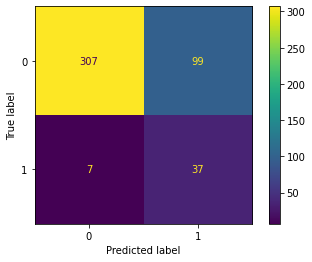

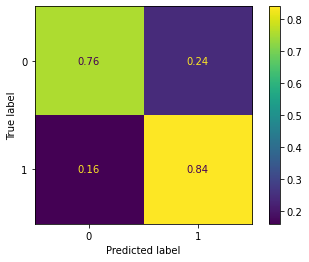

In [55]:
t_best=DecisionTreeClassifier(criterion='entropy',min_samples_split=432,class_weight='balanced')
t_best.fit(x_train,y_train)
disp=ConfusionMatrixDisplay(confusion_matrix(y_test,t_best.predict(x_test)),display_labels=t_best.classes_)
disp.plot()
plt.show()
disp=ConfusionMatrixDisplay(confusion_matrix(y_test,t_best.predict(x_test),normalize='true'),display_labels=t_best.classes_)
disp.plot()
plt.show()

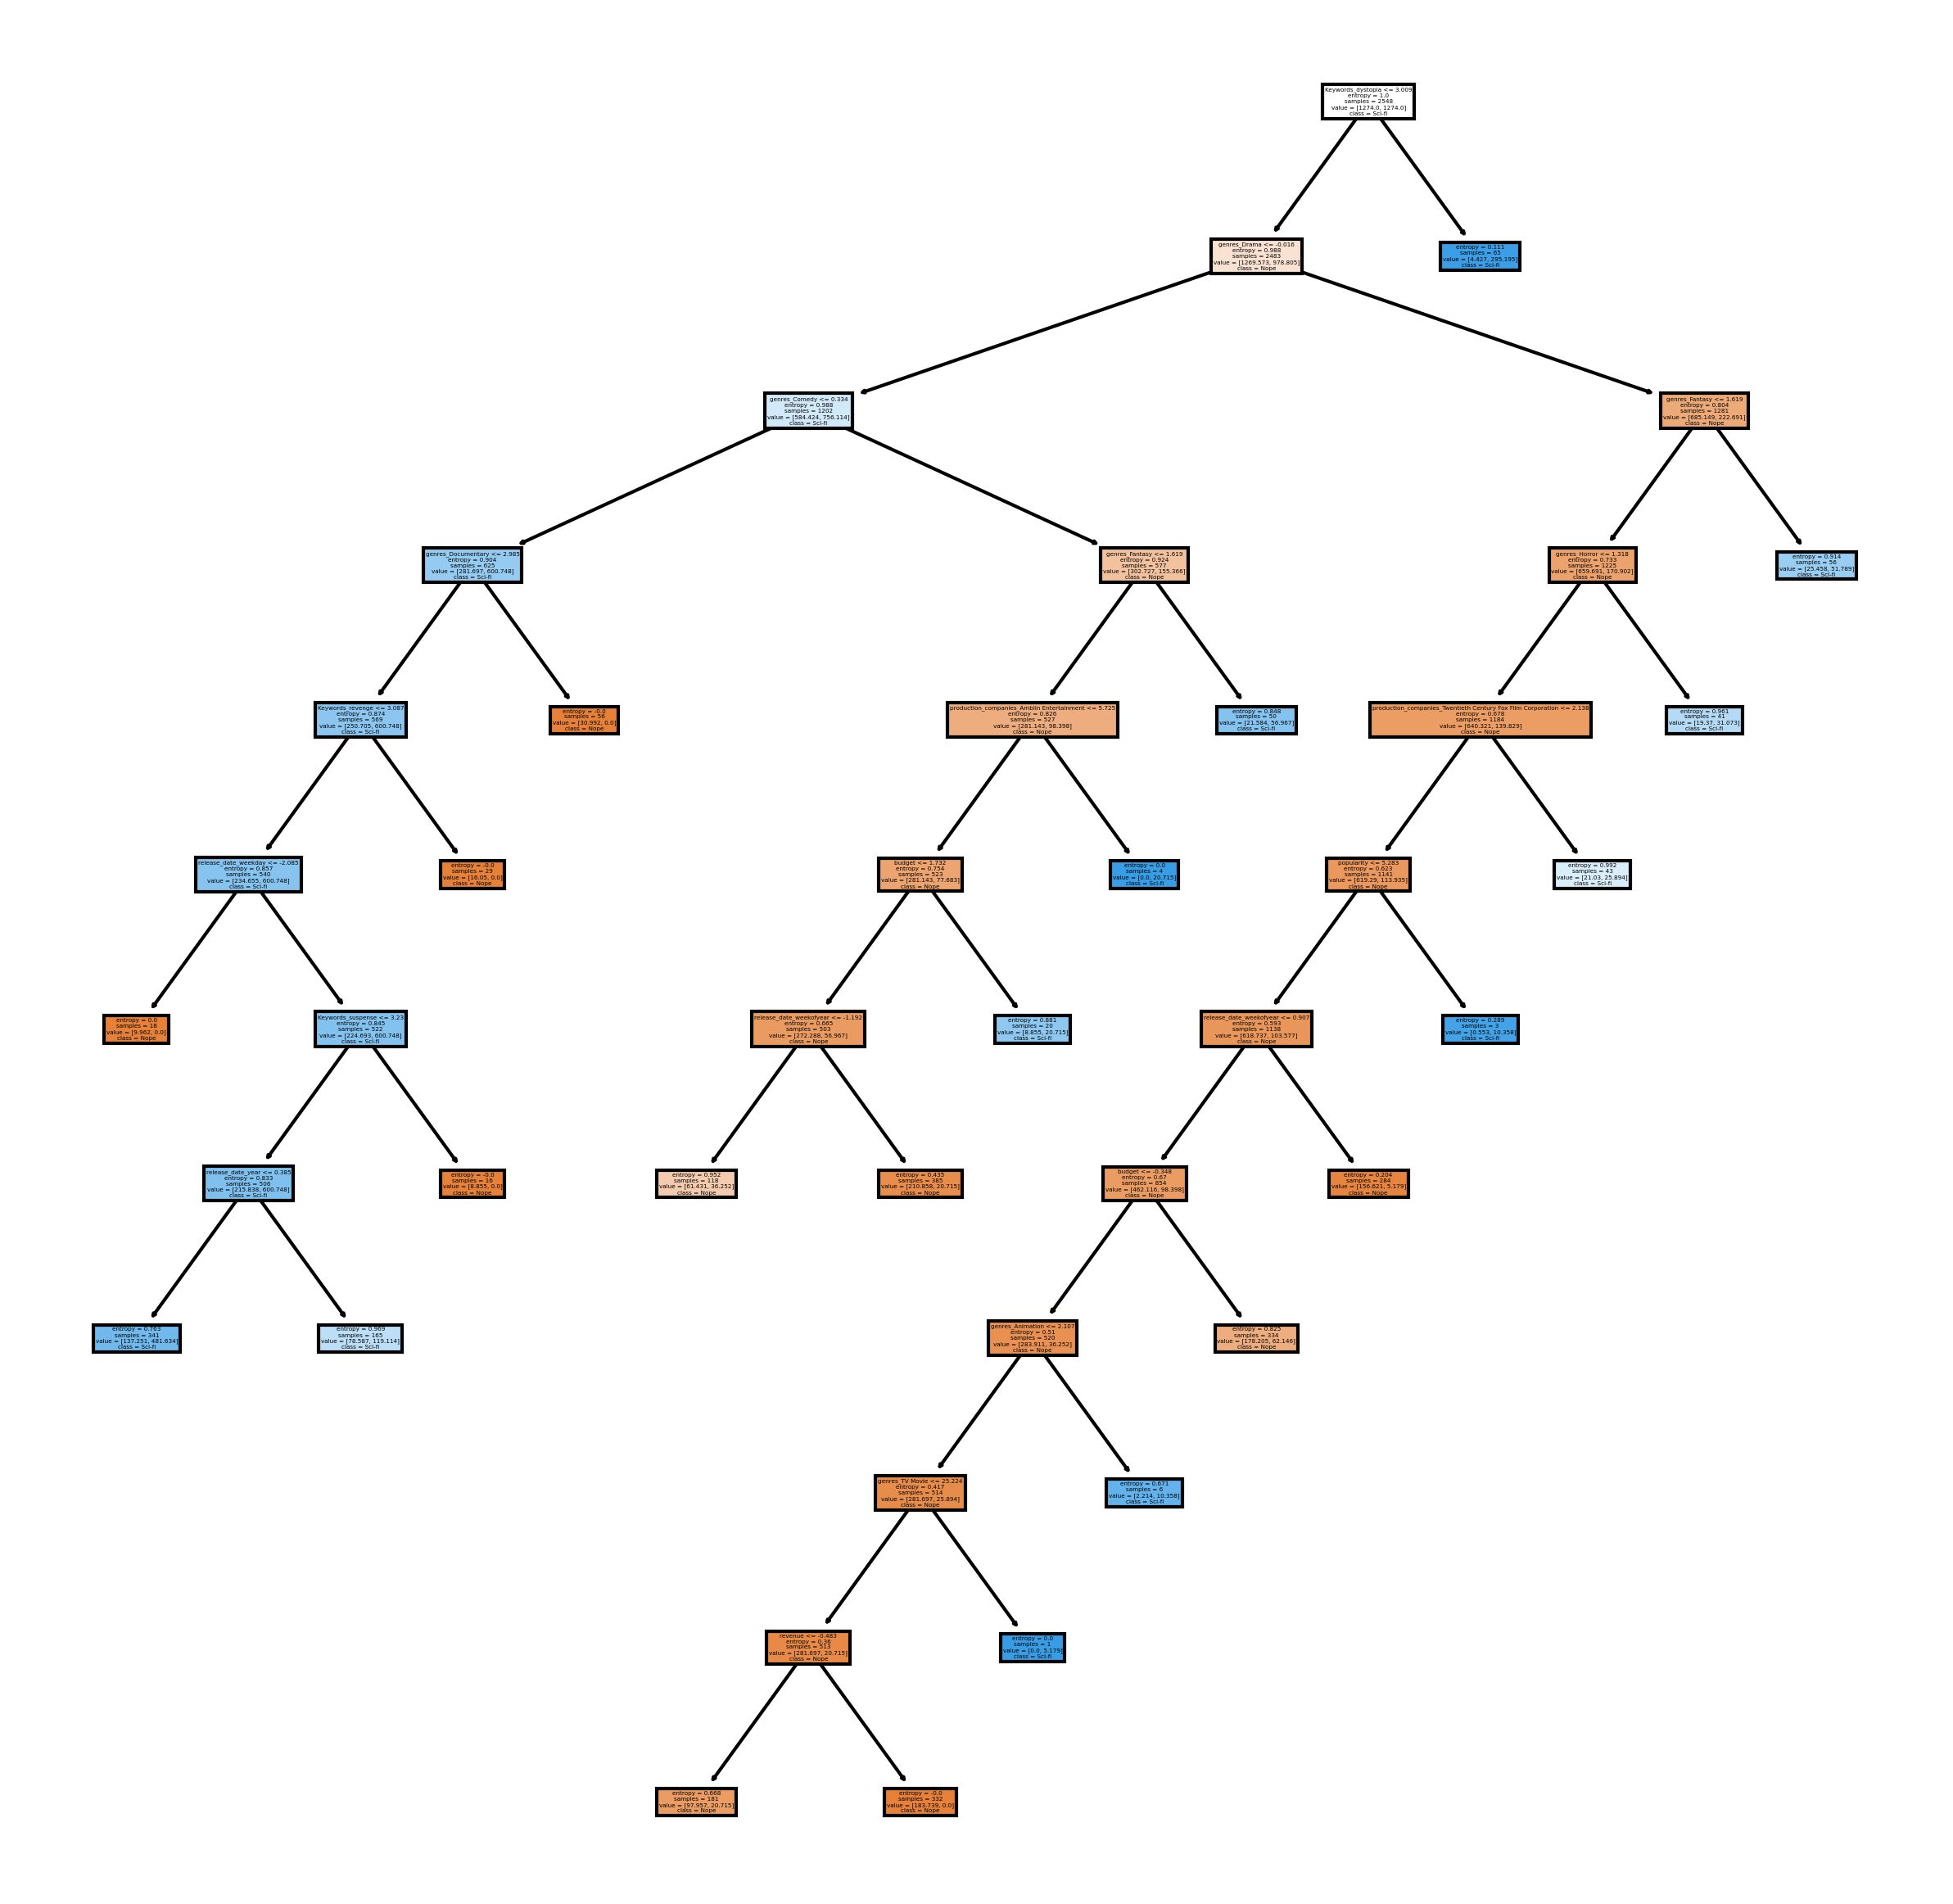

In [56]:
from sklearn.tree import plot_tree
fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(10,10),dpi=300)
plot_tree(t_best,feature_names=train.drop(['genres_Science Fiction'], axis=1).keys(),filled=True, class_names=["Nope","Sci-fi"])
plt.show()

In [57]:
#from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
#import seaborn as sns
#import matplotlib.pyplot as plt
#logreg = LogisticRegression()
#logreg.fit(x_train, y_train)
#y_pred = logreg.predict(x_test)
#acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)
#print(acc_logreg)

In [58]:
# cf = confusion_matrix(y_test,y_pred)
#figsize = plt.rcParams.get('figure.figsize')
#plt.figure(figsize=figsize)
#group_names = ['True Neg','False Pos','False Neg','True Pos']
#group_percentages = ["{0:.2%}".format(value) for value in ((cf.T/np.sum(cf,axis=1)).T).flatten()]
#group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
#group_labels = ["{}\n".format(value) for value in group_names]
#box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
#box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])
#sns.heatmap(cf,annot=box_labels,fmt="",cmap='Blues')
#plt.ylabel('True label')
#plt.xlabel('Predicted label')

In [59]:
#print('Sensitivity: ', group_percentages[3])
#print('Specificity: ', group_percentages[0])

The sensitivity is 0.84 and the specificity is 0.76.

## Part 5: Prediction with less leakage (5 points)

From Wikipedia, [data leakage](https://en.wikipedia.org/wiki/Leakage_(machine_learning)) is the use of information in the model training process which would not be expected to be available at prediction time, causing the predictive scores (metrics) to overestimate the model's utility when run in a production environment.

Feature or column-wise leakage is caused by the inclusion of columns which are one of the following: a duplicate label, a proxy for the label, or the label itself

Considering we're doing binary classification of whether a movie is science fiction, identify the most prominent cause of feature leakage among the features added during Exercise 3. 

1) **Argue** for your choice, 2) train a classifier not subject to this feature leakage (it's OK to create a new train/test split) and 3) **report the results** as you did in Part 4.

**Arguement**: Considering we are predicting whether or not the movie is of the science fiction genre, it is assumed that genre data would not be available at prediction time.

A new classifier will be trained where the binary genre data is not included.

In [60]:
target = train['genres_Science Fiction']
predictors = train.drop(train.columns[4:24], axis=1)
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.15, random_state = 0,stratify = target)

In [61]:
#THIS PART WAS COMMENTED OUT CAUSE WE DECIDED TO USE A DECISION TREE WHERE STANDARDISATION DOES NOT MATTER.
#scaler = StandardScaler()  
#scaler.fit(x_train)  
#x_train = scaler.transform(x_train) 
#x_test = scaler.transform(x_test)

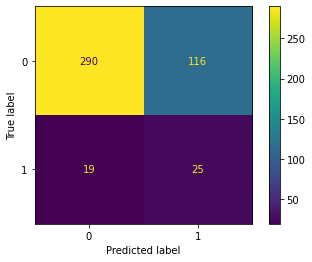

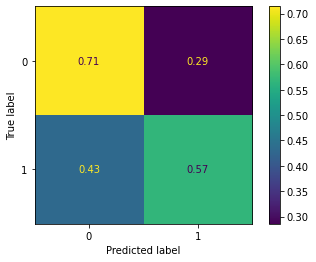

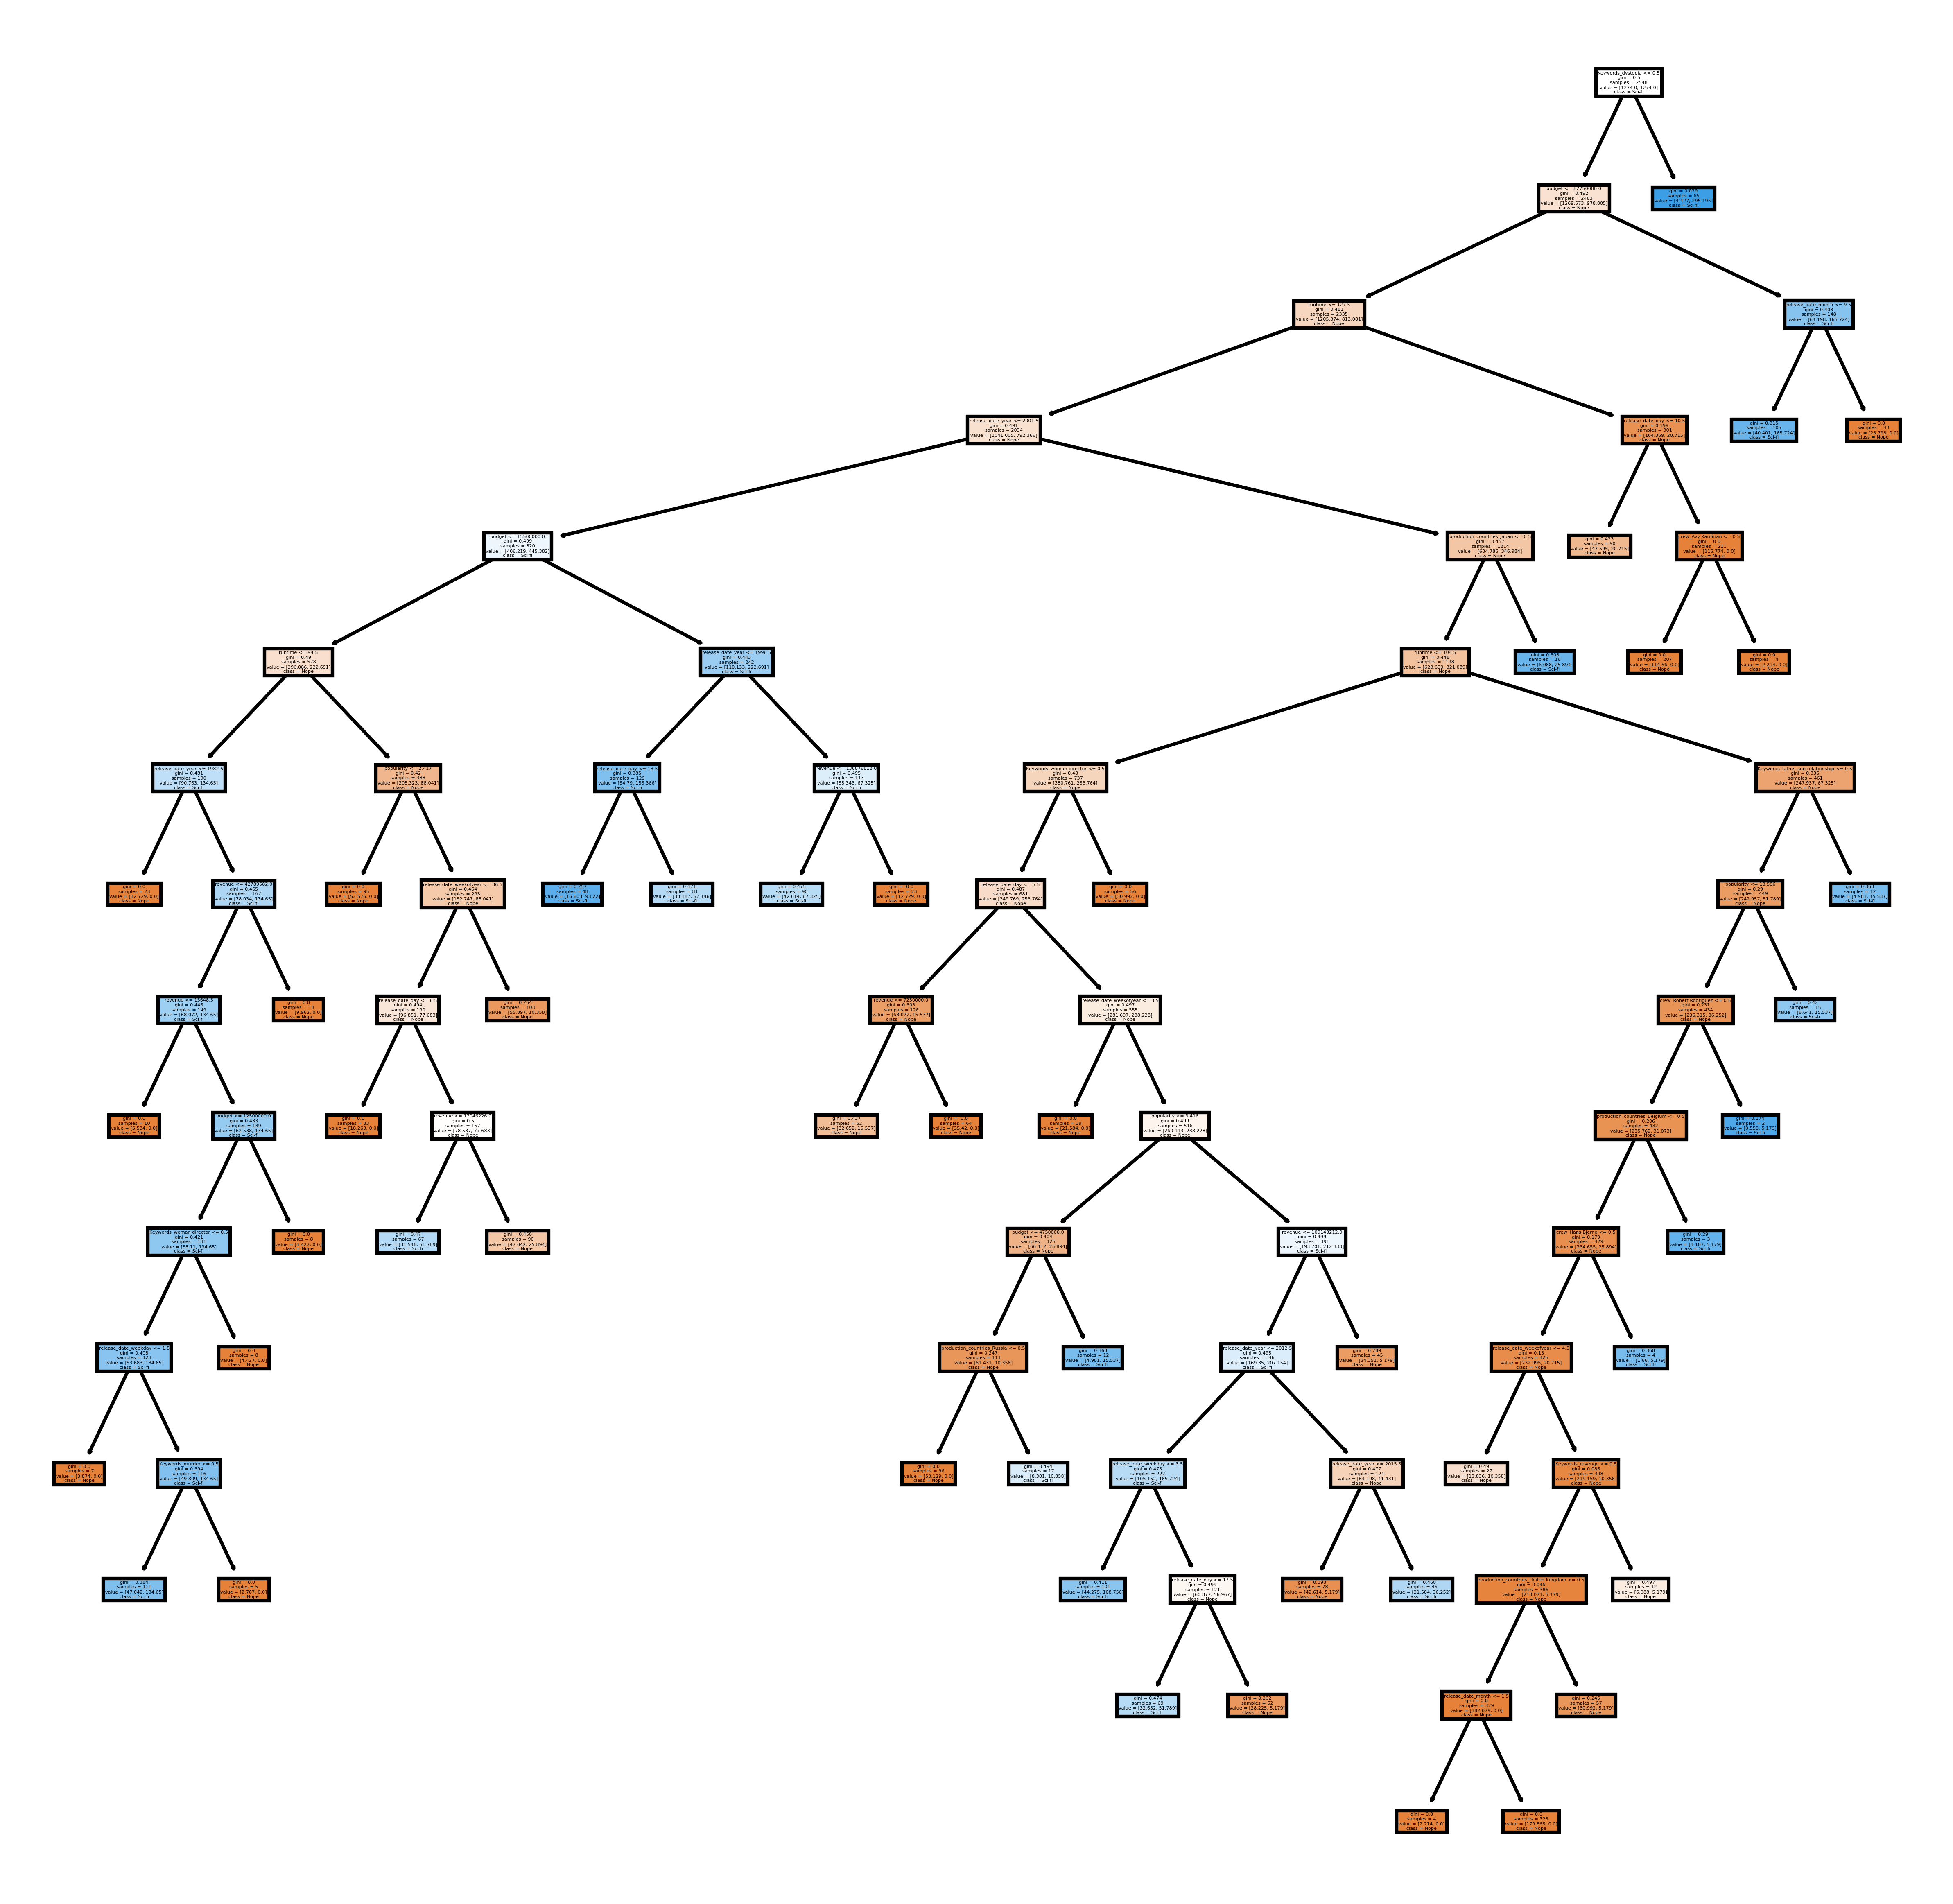

In [62]:
#we first performed crossvalidation
#parameters={'min_samples_split':np.arange(2,500,10),'criterion':['gini','entropy'],'class_weight':["balanced",None]}
#t=DecisionTreeClassifier()
#mygrid=GridSearchCV(t,parameters,scoring='balanced_accuracy')
#mygrid.fit(x_train,y_train)
#print(mygrid.best_estimator_)
t_best=DecisionTreeClassifier(criterion="gini",min_samples_split=112,class_weight="balanced")
t_best.fit(x_train,y_train)
disp=ConfusionMatrixDisplay(confusion_matrix(y_test,t_best.predict(x_test)),display_labels=t_best.classes_)
disp.plot()
plt.show()
disp=ConfusionMatrixDisplay(confusion_matrix(y_test,t_best.predict(x_test),normalize='true'),display_labels=t_best.classes_)
disp.plot()
plt.show()
fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(10,10),dpi=600)
plot_tree(t_best,feature_names=train.drop(train.columns[4:24], axis=1).keys(),filled=True,class_names=["Nope","Sci-fi"])
plt.show()

In [63]:
# the data was standardised when using logistic regression
# logreg = LogisticRegression()
# logreg.fit(x_train, y_train)
# y_pred = logreg.predict(x_test)
#acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)
#print(acc_logreg)

In [64]:
#cf = confusion_matrix(y_test,y_pred)
#figsize = plt.rcParams.get('figure.figsize')
#plt.figure(figsize=figsize)
#group_percentages = ["{0:.2%}".format(value) for value in ((cf.T/np.sum(cf,axis=1)).T).flatten()]
#group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
#group_labels = ["{}\n".format(value) for value in group_names]
#box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
#box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])
#sns.heatmap(cf,annot=box_labels,fmt="",cmap='Blues')
#plt.ylabel('True label')
#plt.xlabel('Predicted label')

The sensitivity for our decision tree was 0.57 and the specificity was 0.72.

# Exercise 4: Basic movie recommendation system (20 points)

In this exercise, you'll build a simple movie recommendation system.  The system will take a movie as input and recommend a list of similar movies. In order to recommend similar movies, you will use the correlation between the ratings of movies as a similarity metric. We'll use Pearson's correlation. 
 
The data for this exercise is available in the following URLs. It contains basic info about movies, as well as ratings provided by several users.

In [65]:
url1 = 'http://courses.compute.dtu.dk/02807/2021/projects/project1/ratings.csv'
url2 = 'http://courses.compute.dtu.dk/02807/2021/projects/project1/movies.csv'

## Part 1: Preparing the ratings data (10 pts)

Read the data from these two URLs, and create a single dataframe from them, with the following columns:

| userId | movieId | rating | timestamp | title | genres |
|--------|---------|--------|-----------|-------|--------|
|        |         |        |           |       |        |

Call the dataframe `movie_data`.

In [66]:
ratings = pd.read_csv(url1)
movies = pd.read_csv(url2)

In [67]:
movie_data = ratings.merge(movies, how='left', on='movieId')

In [68]:
movie_data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


To find the correlation between the ratings of movies, create a dataframe where each column is a movie name and each row contains the rating assigned by a specific user to that movie. 

You'll notice that this dataframe has many NaN values, since each movie is not rated by every user. Call the dataframe `user_ratings`.

In [69]:
user_ratings = movie_data.pivot_table(index='userId', columns='title', values='rating')
user_ratings

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


## Part 2: Finding the most similar movies (10 pts)

Each column contains all the user ratings for a particular movie. Let's take the user ratings for the movie Toy Story.

In [70]:
toystory_ratings = user_ratings['Toy Story (1995)']
toystory_ratings

userId
1      4.0
2      NaN
3      NaN
4      NaN
5      4.0
      ... 
606    2.5
607    4.0
608    2.5
609    3.0
610    5.0
Name: Toy Story (1995), Length: 610, dtype: float64

Next, find the correlation between the user ratings for Toy Story and the user ratings of all other movies. 
 
More specifically, create a dataframe that contains two columns, called `title` and `Correlation`. Each row should contain a movie title $x$, followed by the pairwise correlation between the column of ratings for Toy Story and the column of ratings for $x$.  Drop any rows with null values, and display the resulting dataframe.
 
Use built-in functions to compute correlations and avoid explicit loops.

In [71]:
toystory_corr = user_ratings.drop('Toy Story (1995)', axis=1).corrwith(toystory_ratings,method='pearson')
toystory_corr = toystory_corr.dropna().to_frame().reset_index()
toystory_corr.rename( columns={0:'correlation'}, inplace=True )
toystory_corr.sort_values('correlation',ascending=False, inplace=True)
toystory_corr.head(5)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,title,correlation
2383,Land Before Time III: The Time of the Great Gi...,1.0
1522,For the Birds (2000),1.0
1454,"Final Destination, The (Final Destination 4) (...",1.0
876,Coffee Town (2013),1.0
3297,Police Story 2 (Ging chaat goo si juk jaap) (1...,1.0


Sort the movies by descending order of correlation to find out highly correlated movies at the top. Display the 5 most highly correlated movies.


If you computed correlations correctly, you will find that the recommended movies are not very well known. We can generate more popular recommendations by finding highly correlated movies that have a sensible number of ratings. 
 
Add a column to your correlation table, called `rating_counts`, which stores the number of ratings received by each movie.

In [72]:
toystory_corr = pd.merge(toystory_corr,user_ratings.transpose().count(axis=1).reset_index(),how='left',on='title')
toystory_corr.rename( columns={0:'rating_counts'}, inplace=True )
toystory_corr.head(5)

,title,correlation,rating_counts
0,Land Before Time III: The Time of the Great Gi...,1.0,3
1,For the Birds (2000),1.0,5
2,"Final Destination, The (Final Destination 4) (...",1.0,3
3,Coffee Town (2013),1.0,2
4,Police Story 2 (Ging chaat goo si juk jaap) (1...,1.0,2


Now find the 5 movies with the highest correlation with Toy Story, which have strictly more than 100 ratings. Display the result below. 

In [73]:
toystory_corr.drop(toystory_corr[toystory_corr.rating_counts <= 100].index).head(5)

,title,correlation,rating_counts
1060,"Incredibles, The (2004)",0.643301,125
1107,Finding Nemo (2003),0.618701,141
1127,Aladdin (1992),0.611892,183
1465,"Monsters, Inc. (2001)",0.490231,132
1582,Mrs. Doubtfire (1993),0.446261,144
